<a href="https://colab.research.google.com/github/kok554/computervision/blob/main/study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [2]:
# 텐서 초기화
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

In [3]:
# Numpy 배열로 Tensor 생성하기
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
shape = (2,3, )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor}")
print(f"Ones Tensor: \n {ones_tensor}")
print(f"Zeros_Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2777, 0.0029, 0.8740],
        [0.2569, 0.2697, 0.3602]])
Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros_Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
# PyTorch를 사용하여 FashionMNIST 데이터셋을 로드하기 위한 라이브러리 import
import torch
from torchvision import datasets # torchvision을 통해 데이터셋을 쉽게 가져올수있음
from torchvision.transforms import ToTensor # 데이터셋 이미지를 Tensor로 변환
import cv2
import numpy as np

# FashionMNIST 데이터셋의 학습 데이터 로드
training_data = datasets.FashionMNIST(
    root = "data", # 데이터를 저장할 디렉터리 경로
    train = True, # 학습용 데이터셋 로드
    download = True, # 데이터가 없으면 다운로드
    transform = ToTensor() #이미지를 ToTensor 형태로 변환
)

# FashionMNIST 데이터셋의 테스트 데이터 로드
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.93MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.08MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
# 레이블 매핑 정의
labels_map = {
0: "T-Shirt",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle Boot",
}

In [9]:
from google.colab.patches import cv2_imshow

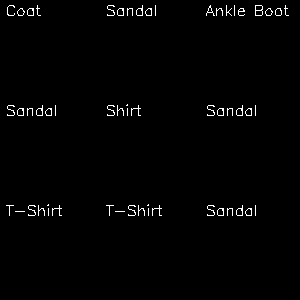

In [11]:
# 열과 행 개수를 정의
cols, rows = 3,3

# 이미지를 저장할 빈 리스트 생성
images = []

# 3x3 = 9개의 이미지를 가져오기 위한 반복문
for i in range(cols * rows):
  # training_data에서 랜덤한 인덱스를 선택
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  # 랜덤 인덱스에 해당하는 이미지와 레이블 가져오기
  img, label = training_data[sample_idx]
  # 이미지 텐스를 2차원 형태로 압축 (채널 제거)하고 Numpy 배열로 변환
  img = img.squeeze().numpy()
  # OpenCv를 사용해 흑백 이미지를 BGR 이미지로 변환
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  # 이미지를 100x100 픽셀로 크기 조정
  img = cv2.resize(img, (100, 100))
  # 레이블 맵에서 현재 레이블에 해당하는 텍스트를 가져옴
  title = labels_map[label]
  # 이미지 위에 텍스트로 레이블을 추가
  img = cv2.putText(
        img,                  # 이미지
        title,                # 텍스트 (레이블 이름)
        (5, 15),              # 텍스트 시작 위치 (x, y 좌표)
        cv2.FONT_HERSHEY_SIMPLEX,  # 폰트 종류
        0.5,                  # 폰트 크기
        (255, 255, 255),      # 텍스트 색상 (흰색)
        1,                    # 텍스트 두께
        cv2.LINE_AA           # 텍스트 렌더링 방식 (안티에일리어싱 적용)
    )
  # 처리된 이미지를 리스트에 추가
  images.append(img)

# 각 행에 포함된 이미지를 수평으로 결합하여 한 행으로 만듦
rows_images = [np.hstack(images[i*cols:(i+1)*cols]) for i in range(rows)]

# 행들을 수직으로 결합하여 최종적으로 3x3 그리드 이미지를 생성
grid_image = np.vstack(rows_images)

# OpenCV 창에 이미지 그리드를 띄움
cv2_imshow(grid_image)


In [32]:
# 필요한 라이브러리 가져오기
import os  # 파일 및 디렉터리 경로 처리를 위한 모듈
import cv2  # OpenCV 라이브러리, 이미지 로드 및 처리에 사용
from torch.utils.data import Dataset, DataLoader  # PyTorch 데이터셋 및 데이터 로더
from torchvision import transforms  # 이미지 데이터 변환을 위한 torchvision 모듈

# 커스텀 데이터셋 클래스 정의 (PyTorch의 Dataset 상속)
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        """
        클래스 초기화 메서드. 데이터셋의 경로 및 변환 설정.
        - img_dir: 이미지가 저장된 디렉터리 경로 (string)
        - transform: 이미지 변환 파이프라인 (torchvision.transforms.Compose 등)
        """
        self.img_dir = img_dir  # 이미지가 저장된 디렉터리 경로 저장
        self.transform = transform  # 이미지 변환 설정 저장
        self.img_labels = []  # 이미지 경로와 레이블 정보를 저장할 리스트 초기화

        # 'cats' 디렉터리 경로 생성 및 이미지 레이블링 (레이블: 0)
        a_dir = os.path.join(img_dir, 'cats')
        self.img_labels += [
            (os.path.join(a_dir, img), 0)  # 각 이미지 경로와 레이블 0 추가
            for img in os.listdir(a_dir)  # 디렉터리 내 파일 목록 확인
            if img.endswith(('jpg', 'png', 'jpeg'))  # 특정 확장자 필터링
        ]

        # 'dogs' 디렉터리 경로 생성 및 이미지 레이블링 (레이블: 1)
        b_dir = os.path.join(img_dir, 'dogs')
        self.img_labels += [
            (os.path.join(b_dir, img), 1)  # 각 이미지 경로와 레이블 1 추가
            for img in os.listdir(b_dir)  # 디렉터리 내 파일 목록 확인
            if img.endswith(('jpg', 'png', 'jpeg'))  # 특정 확장자 필터링
        ]

        # 변환(transform)이 설정되지 않은 경우 기본 변환 설정
        if self.transform is None:
            self.transform = transforms.Compose([
                transforms.ToPILImage(),  # OpenCV 이미지를 PIL 이미지로 변환
                transforms.Resize((128, 128)),  # 이미지를 128x128 크기로 조정
                transforms.ToTensor(),  # 이미지를 텐서로 변환 (범위: [0, 1])
                # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                # 정규화: 각 RGB 채널의 평균과 표준편차를 기준으로 정규화
            ])

    def __len__(self):
        # 데이터셋의 전체 이미지 개수를 반환하는 메서드
        # PyTorch DataLoader에서 데이터셋 크기를 알기 위해 호출
        return len(self.img_labels)

    def __getitem__(self, idx):
        """
        주어진 인덱스(idx)에 해당하는 데이터(이미지와 레이블)를 반환하는 메서드
        - idx: 데이터셋에서 접근할 데이터의 인덱스
        """

        # 인덱스를 이용해 이미지 경로와 레이블을 가져옴
        img_path, label = self.img_labels[idx]

        # OpenCV를 사용해 이미지 파일 읽기
        image = cv2.imread(img_path)  # BGR 형식으로 이미지를 읽음
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB 변환 (PyTorch는 RGB 형식 사용)

        # 이미지 변환(transform)이 설정된 경우 적용
        if self.transform:
            image = self.transform(image)

        # (이미지, 레이블) 튜플 반환
        return image, label

# 데이터 로더를 생성하는 함수
def create_data_loader(img_dir, batch_size=2, shuffle=True):

    # 커스텀 데이터셋 객체 생성
    dataset = CustomImageDataset(img_dir)

    # DataLoader 생성 및 반환
    # - dataset: 데이터를 로드할 데이터셋 객체
    # - batch_size: 지정된 크기로 데이터를 배치로 묶음
    # - shuffle: 데이터셋의 순서를 랜덤으로 섞을지 여부
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


In [33]:
import cv2
import create_data_loader

# 데이터 디렉터리와 배치 크기 설정
img_dir = 'data'  # 이미지 데이터가 저장된 폴더 경로
batch_size = 2  # 한 번에 로드할 데이터의 개수

# 데이터 로더 생성
data_loader = create_data_loader(img_dir, batch_size=batch_size)

# 데이터 로더에서 데이터를 반복하여 처리
for images, labels in data_loader:
    # 이미지를 NumPy 배열로 변환하고 값 범위를 [0, 255]로 조정
    # PyTorch 텐서: (Batch, Channels, Height, Width)
    # OpenCV가 지원하는 형식: (Height, Width, Channels)
    images = (images.permute(0, 2, 3, 1).numpy() * 255).astype('uint8')
    # `.permute(0, 2, 3, 1)`로 차원을 재배열: (Batch, Height, Width, Channels)

    # 배치의 두 이미지를 가로로 결합
    combined_image = cv2.hconcat([images[0], images[1]])  # 두 이미지를 가로로 합침

    # 이미지에 레이블 정보 추가
    label_text = f'Label 1: {labels[0].item()}, Label 2: {labels[1].item()}'
    cv2.putText(
        combined_image,  # 텍스트를 추가할 이미지
        label_text,  # 추가할 텍스트
        (10, 20),  # 텍스트 시작 위치 (x, y 좌표)
        cv2.FONT_HERSHEY_SIMPLEX,  # 폰트 종류
        0.6,  # 글자 크기
        (255, 255, 255),  # 글자 색 (흰색)
        1  # 글자 두께
    )

    # OpenCV 창에 결합된 이미지 출력
    cv2.imshow("Batch of 2 Images", combined_image)

    # 키 입력 대기: 'q' 키를 누르면 반복문 종료
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

# 모든 OpenCV 창 닫기
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'create_data_loader'